In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
RESULTS_DIRECTORY = os.path.join('.', 'results')
gsat2_df = pd.read_csv(os.path.join(RESULTS_DIRECTORY, 'gsat2_results.csv'))
probsat_df = pd.read_csv(os.path.join(RESULTS_DIRECTORY, 'probsat_results.csv'))

print('GSAT2 results')
display(gsat2_df.head())

print('\nprobSAT results')
display(probsat_df.head())

GSAT2 results


,20-91,36-157,50-218,75-320
0,136.8175,310.6650,2540.5250,1875.0825
1,69.4075,134.3075,171.2200,1425.3100
2,107.2650,175.6225,401.9550,958.8600
3,53.1175,513.5025,1892.3075,7468.1000
4,31.2925,2731.2850,1573.9100,5849.3875



probSAT results


,20-91,36-157,50-218,75-320
0,83.5900,236.4300,1293.0100,1015.0600
1,72.9825,79.0525,129.8100,671.2225
2,72.3925,126.2075,213.2475,480.3575
3,48.4975,280.7025,495.8300,2505.7875
4,30.3625,566.9575,640.1650,1102.9950


In [3]:
print('GSAT')
display(gsat2_df.describe())
print('----------')
print('probSAT')
display(probsat_df.describe())

GSAT


,20-91,36-157,50-218,75-320
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,155.670770,757.615955,2620.289618,7302.843318
std,191.187755,1361.374601,20746.609958,17654.963246
min,12.532500,27.177500,90.795000,165.770000
25%,52.791250,199.313125,453.315625,1217.624375
50%,97.101250,399.657500,947.915000,2641.046250
75%,181.068125,837.493125,2056.219375,6513.365625
max,1957.710000,22868.590000,647297.817500,292428.017500


----------
probSAT


,20-91,36-157,50-218,75-320
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,92.104537,335.250042,862.076955,1900.463873
std,80.181868,407.420466,4194.168838,2650.457919
min,13.125000,27.287500,83.330000,119.517500
25%,42.405000,131.111250,252.489375,562.413125
50%,69.152500,216.737500,438.443750,1009.375000
75%,116.527500,385.981875,826.969375,2054.843125
max,962.545000,5279.690000,129882.972500,25368.955000


In [4]:
gsat2_all_iters_df = pd.melt(gsat2_df, value_vars=gsat2_df.columns)
probsat_all_iters_df = pd.melt(probsat_df, value_vars=probsat_df.columns)

display(gsat2_all_iters_df.describe())
display(probsat_all_iters_df.describe())

,value
count,4000.000000
mean,2709.104915
std,13918.493240
min,12.532500
25%,176.277500
50%,574.391250
75%,1790.375625
max,647297.817500


,value
count,4000.000000
mean,797.473852
std,2583.710724
min,13.125000
25%,118.396875
50%,299.687500
75%,748.941250
max,129882.972500


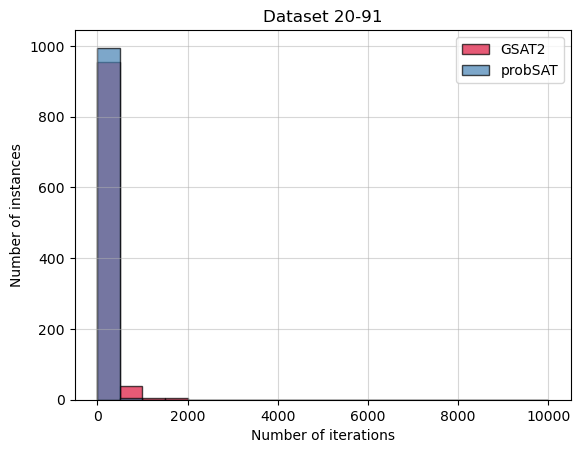

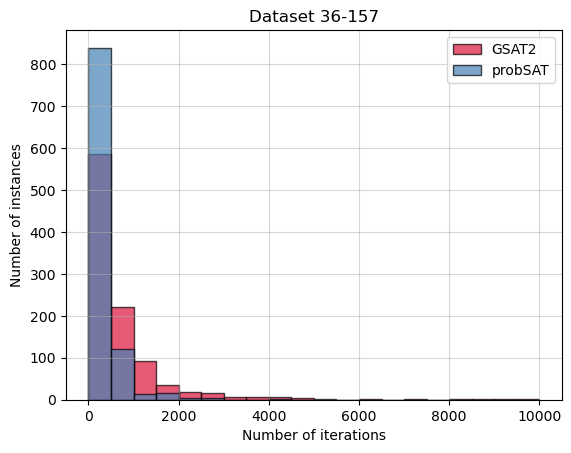

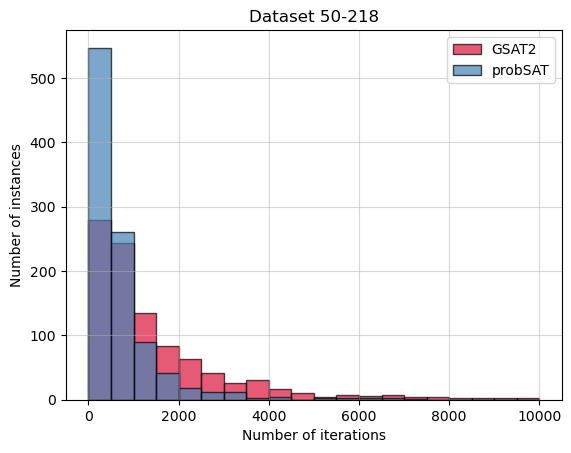

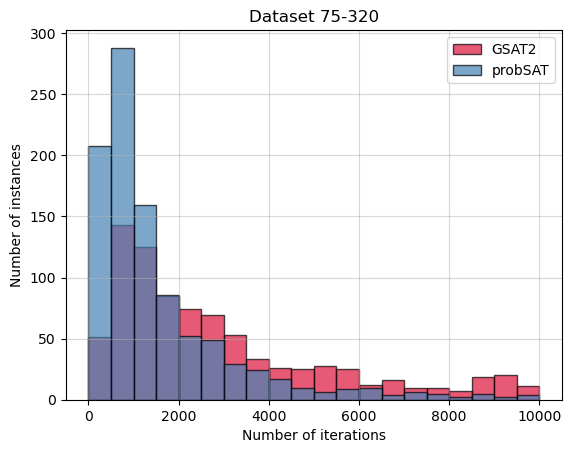

In [9]:
assert(gsat2_df.columns.equals(probsat_df.columns))

for column in gsat2_df.columns:
    plt.figure()

    max_gsat2 = gsat2_df[column].max()
    max_probsat = probsat_df[column].max()
    # max_value = max(max_gsat2, max_probsat)
    max_value = 10000

    bins = np.linspace(0, max_value, 21)
    plt.hist(gsat2_df[column], bins, alpha=0.7, label='GSAT2', color='crimson', edgecolor='black')
    plt.hist(probsat_df[column], bins, alpha=0.7, label='probSAT', color='steelblue', edgecolor='black')
    plt.legend(loc='upper right')
    plt.title(f'Dataset {column}')
    plt.xlabel('Number of iterations')
    plt.ylabel('Number of instances')
    plt.grid(True, linestyle='-', alpha=0.5)
    plt.show()

# ECDF (Empirical Comulative Distributio Function)


In [10]:
def plot_ecdf(gsat2_iters, probsat2_iters, column):
    plt.figure()

    max_value = 10000
    gsat2_iters = np.clip(gsat2_iters, None, max_value)
    probsat2_iters = np.clip(probsat2_iters, None, max_value)

    sorted_gsat2_iters = np.sort(gsat2_iters)
    sorted_probsat_iters = np.sort(probsat2_iters)

    ecdf_gsat2 = np.arange(1, len(sorted_gsat2_iters) + 1) / len(sorted_gsat2_iters)
    ecdf_probsat = np.arange(1, len(sorted_probsat_iters) + 1) / len(sorted_probsat_iters)

    # Create a common x-axis for both ECDFs (union of both datasets)
    common_x = np.sort(np.concatenate((sorted_gsat2_iters, sorted_probsat_iters)))

    # Interpolate ECDFs for the common x-axis
    ecdf_gsat2_interp = np.interp(common_x, sorted_gsat2_iters, ecdf_gsat2, left=0, right=1)
    ecdf_probsat_interp = np.interp(common_x, sorted_probsat_iters, ecdf_probsat, left=0, right=1)

    # Plot the ECDFs
    plt.step(common_x, ecdf_gsat2_interp, where='post', color='crimson', label='GSAT2')
    plt.step(common_x, ecdf_probsat_interp, where='post', color='steelblue', label='probSAT')

    # Plot settings
    plt.legend(loc='lower right')
    plt.xlabel('Iterations')
    plt.ylabel('ECDF')
    plt.title(f'ECDF of {column} Iterations')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()



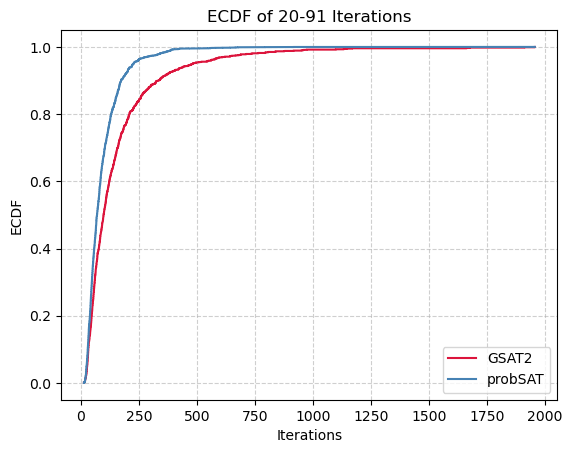

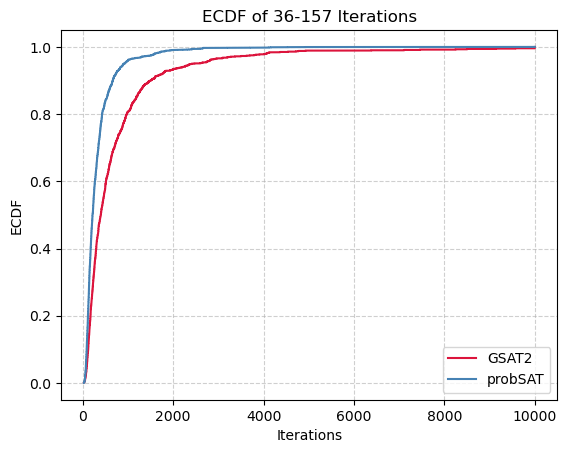

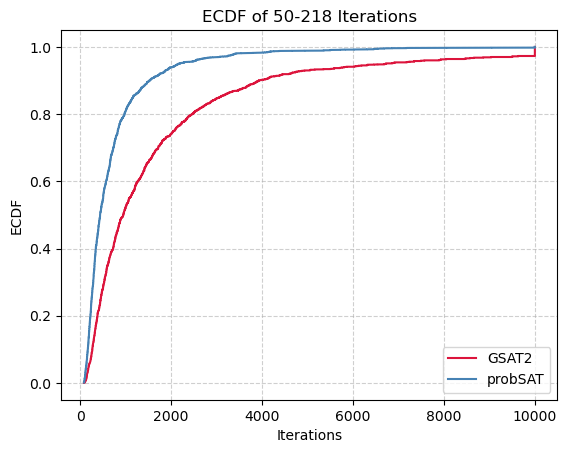

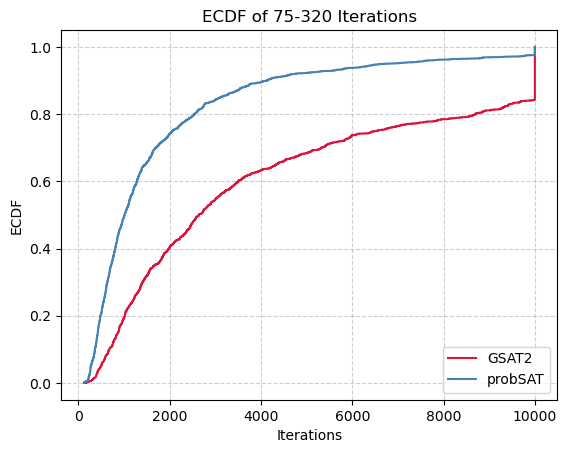

In [11]:
for column in gsat2_df.columns:
    plot_ecdf(gsat2_df[column], probsat_df[column], column)

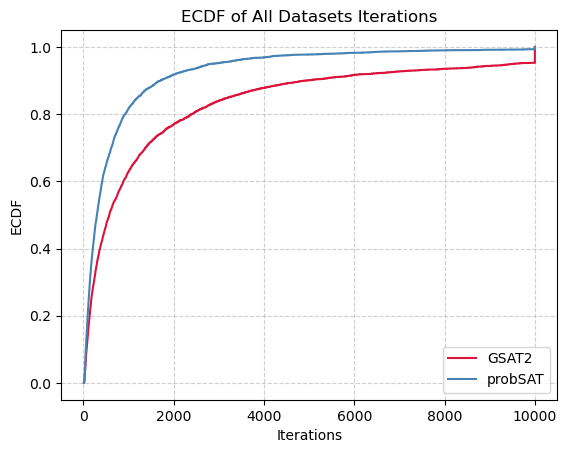

In [12]:
gsat_all_iters = gsat2_all_iters_df['value']
probsat_all_iters = probsat_all_iters_df['value']
plot_ecdf(gsat_all_iters, probsat_all_iters, 'All Datasets')